In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pystan
import experiments
from experiment_manager import *
import utils

100%|██████████| 200/200 [00:08<00:00, 23.93it/s]


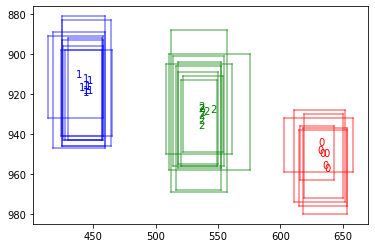

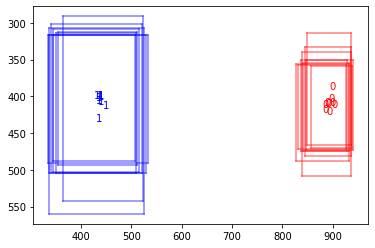

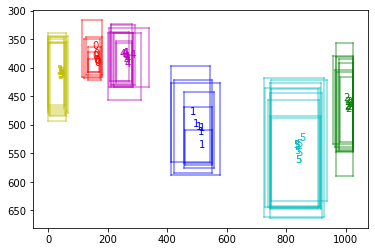

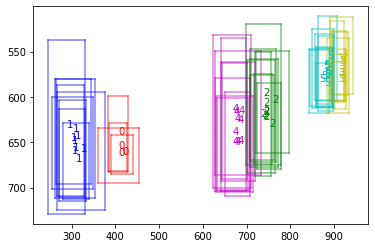

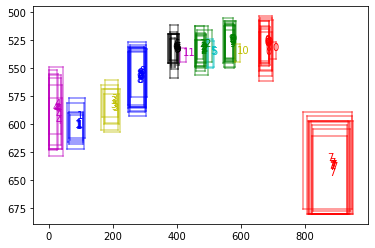

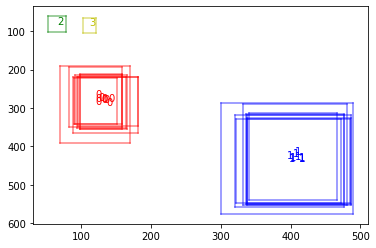

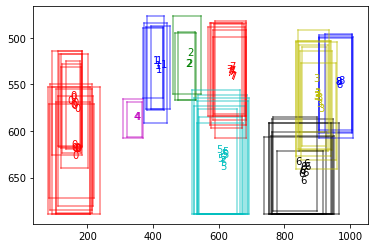

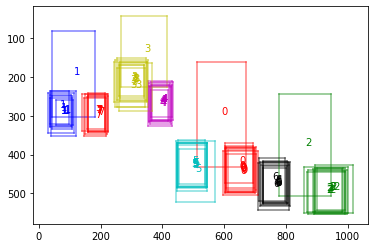

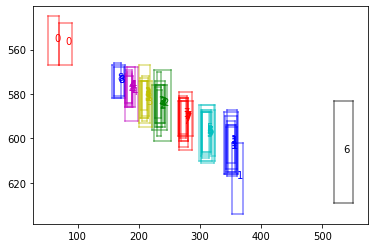

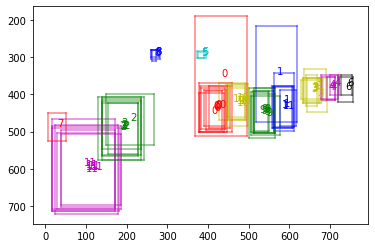

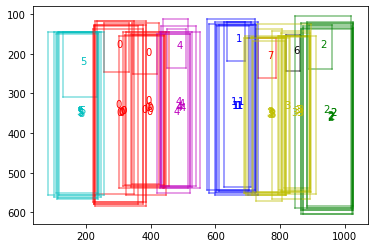

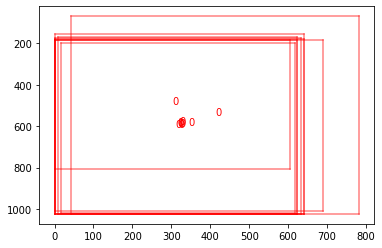

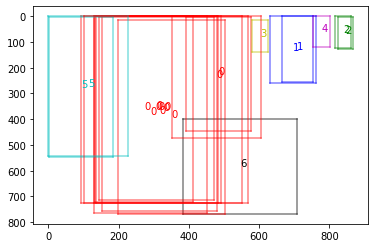

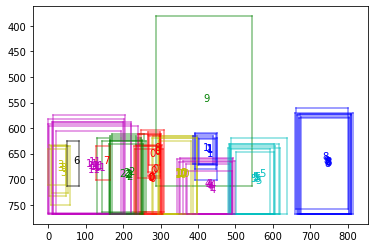

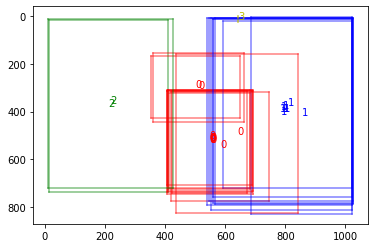

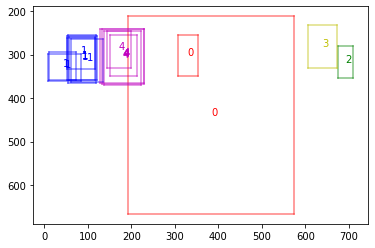

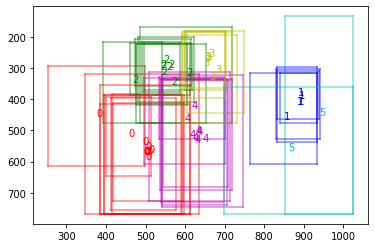

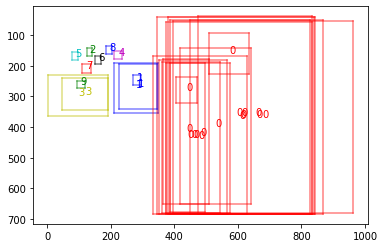

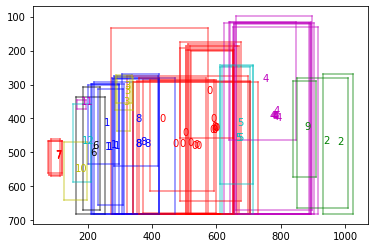

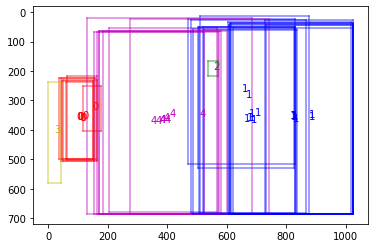

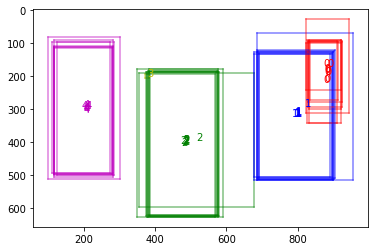

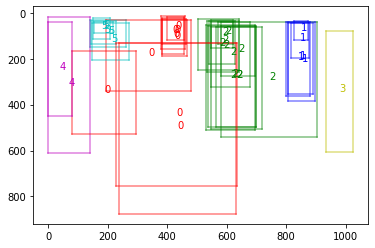

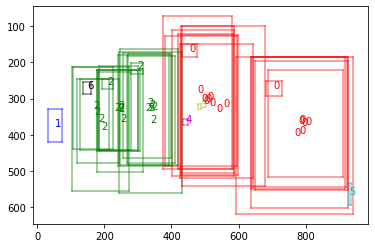

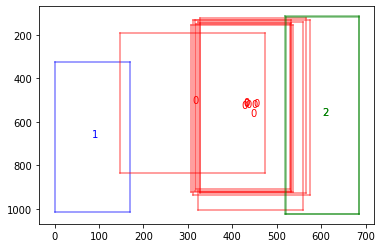

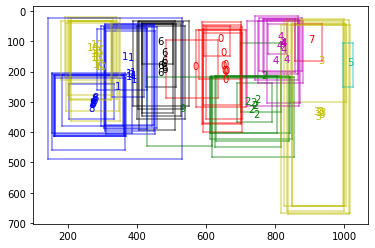

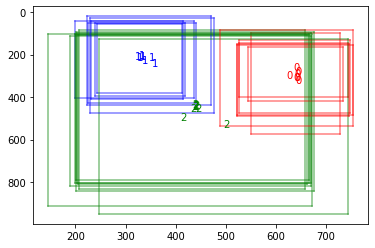

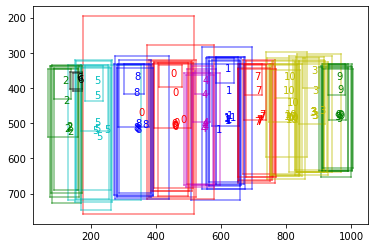

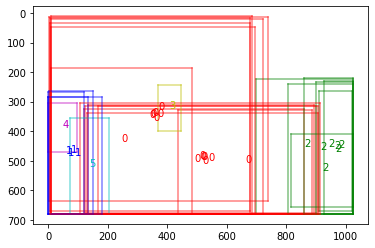

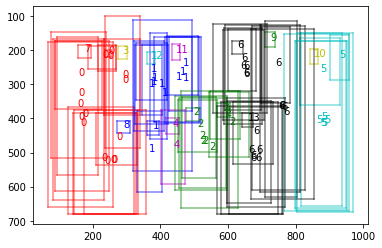

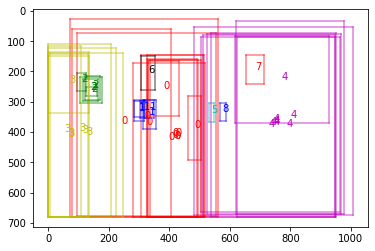

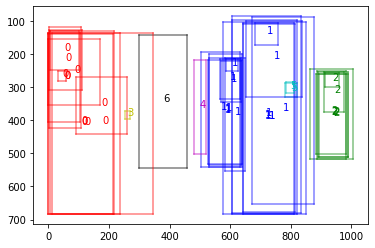

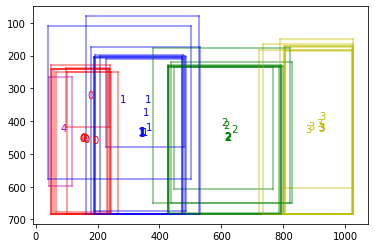

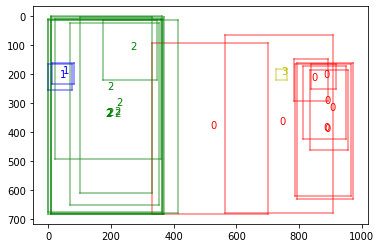

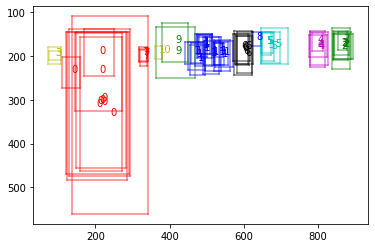

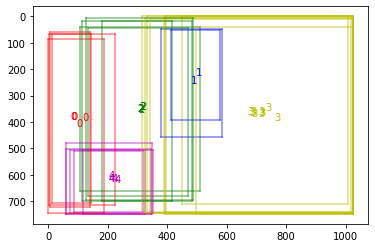

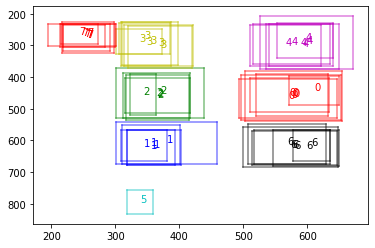

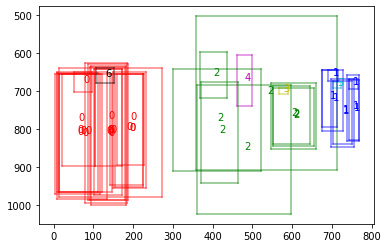

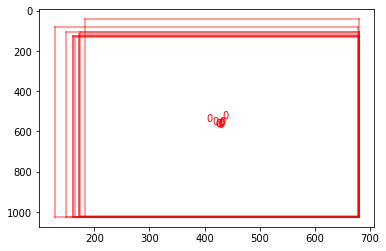

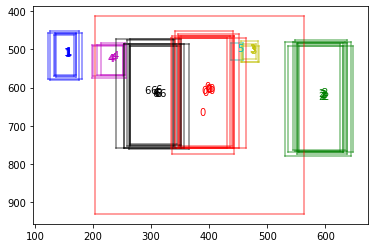

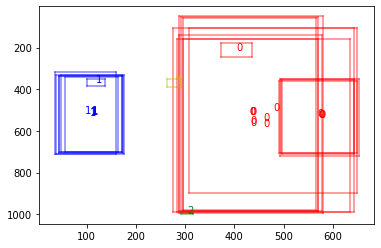

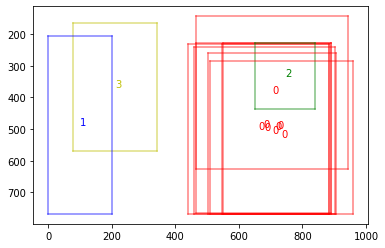

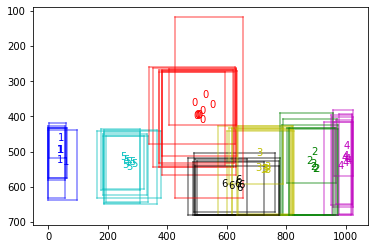

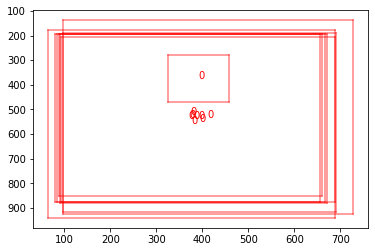

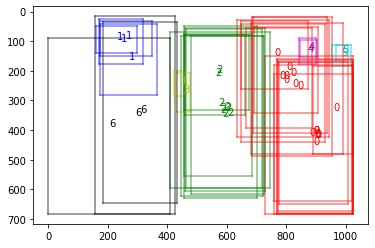

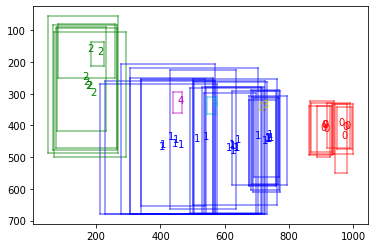

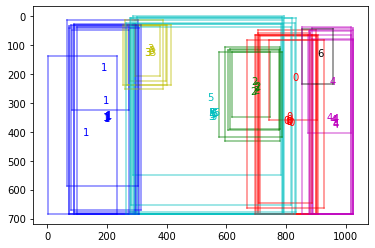

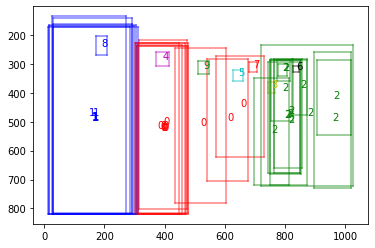

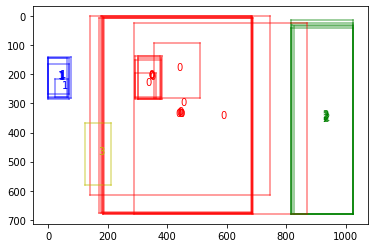

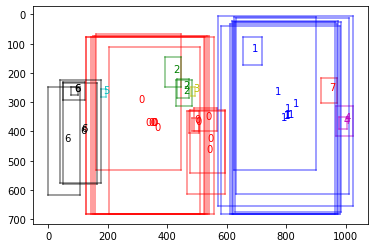

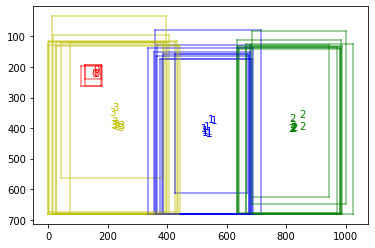

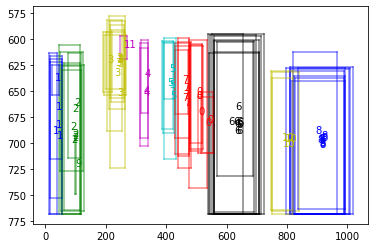

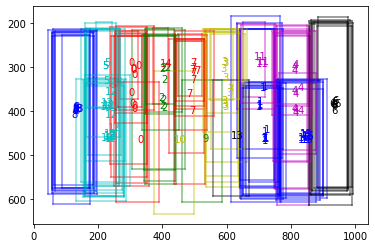

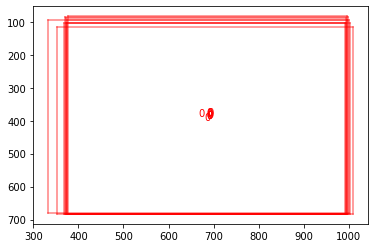

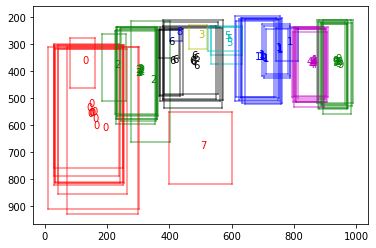

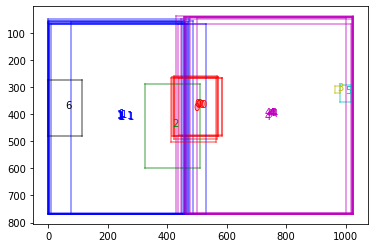

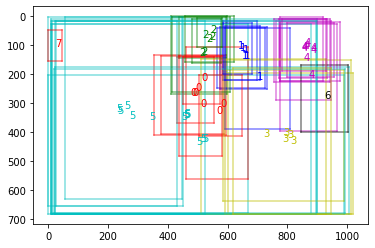

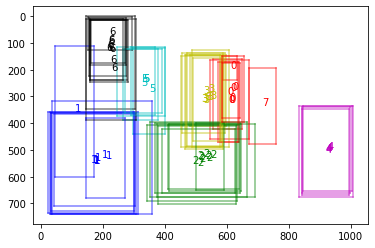

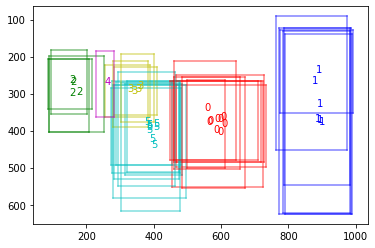

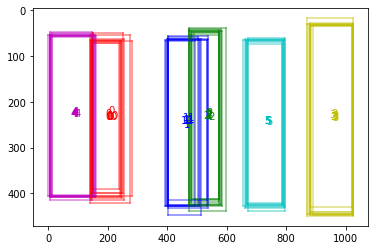

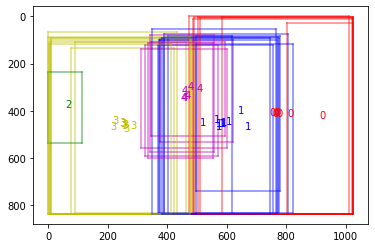

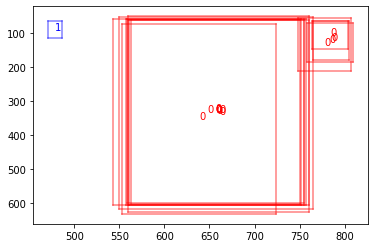

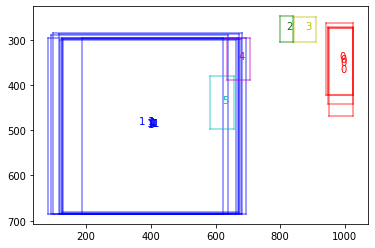

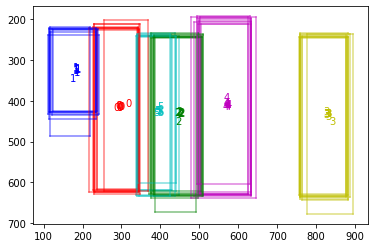

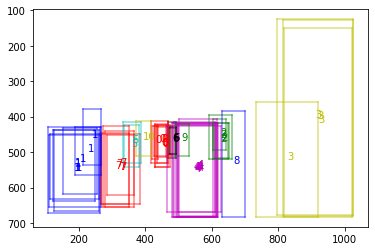

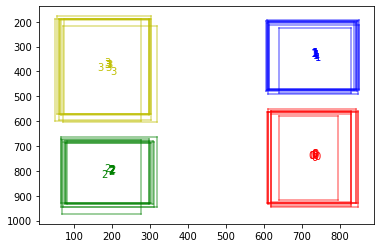

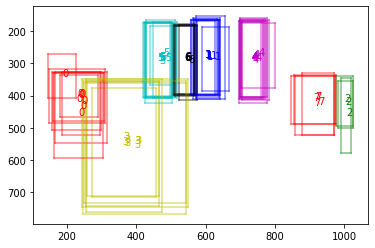

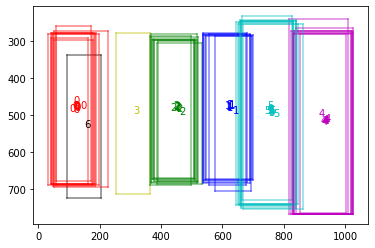

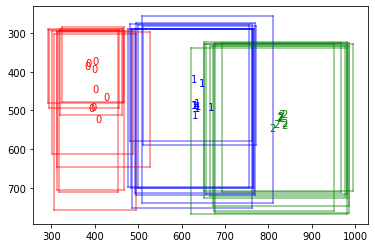

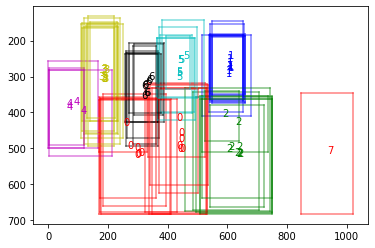

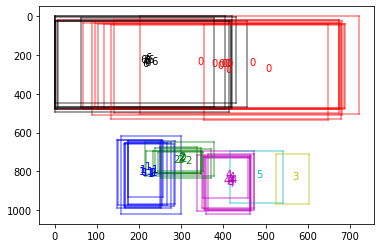

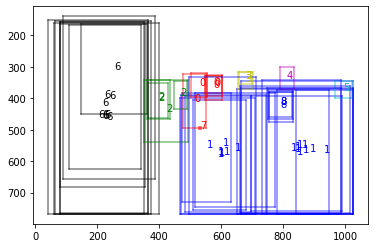

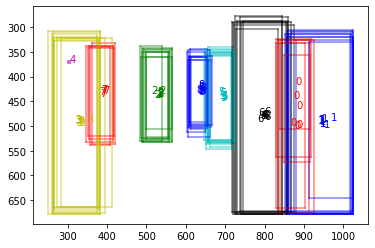

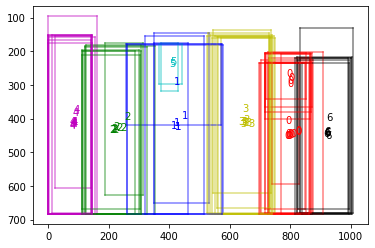

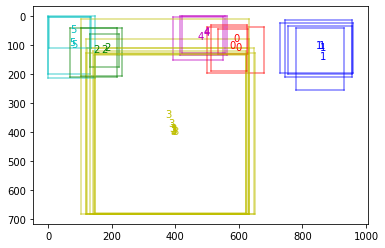

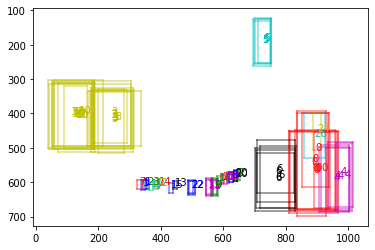

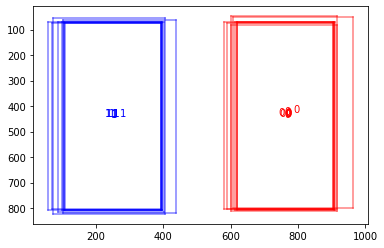

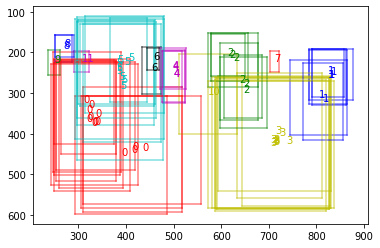

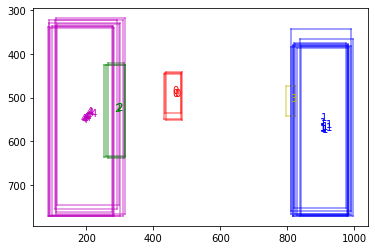

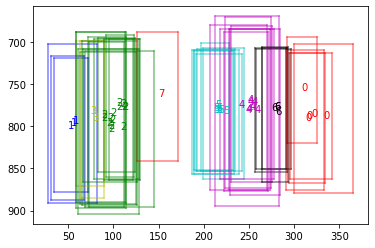

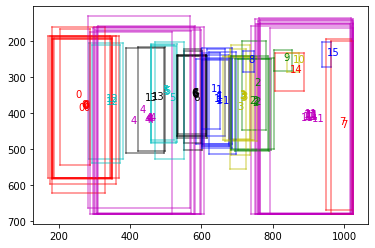

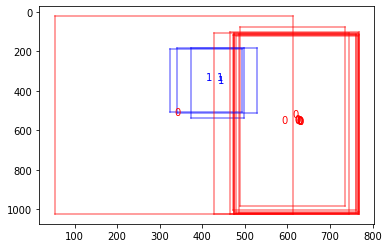

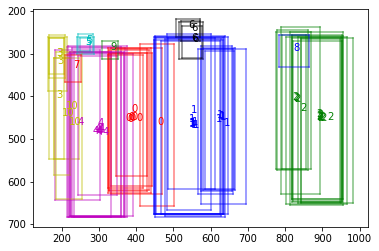

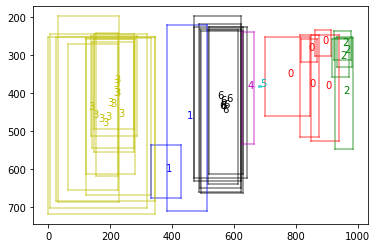

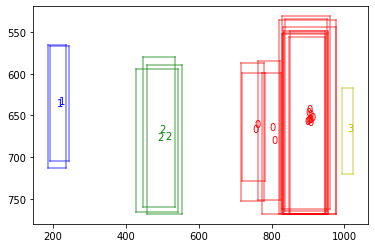

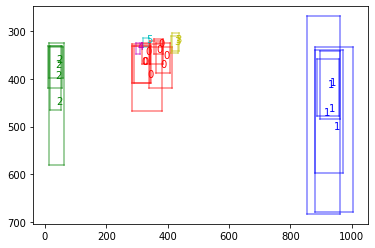

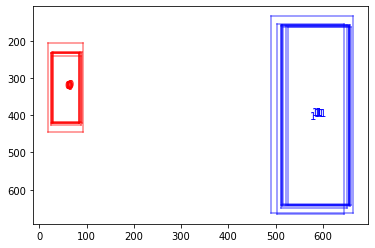

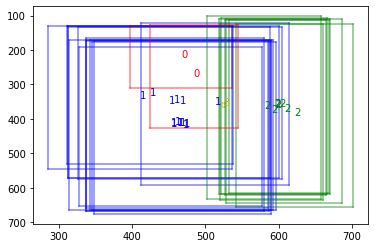

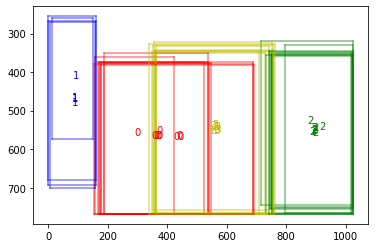

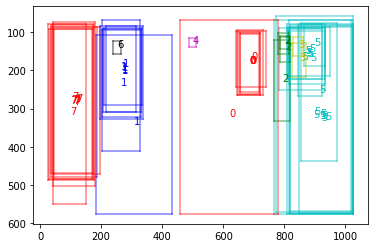

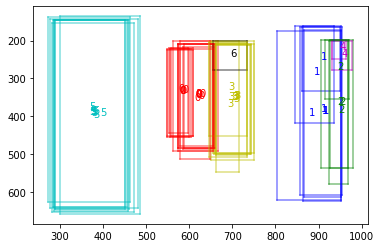

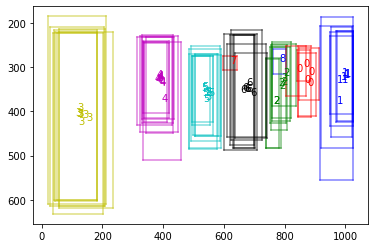

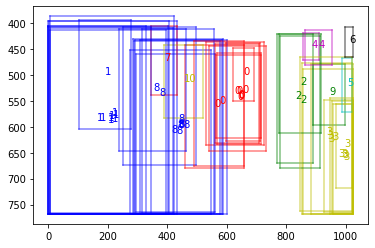

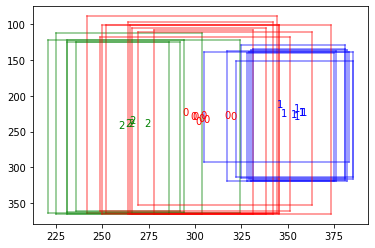

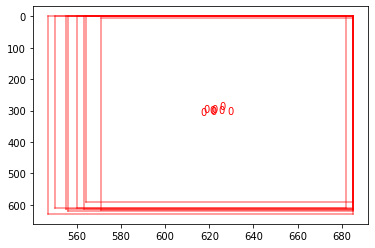

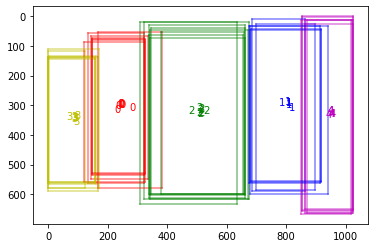

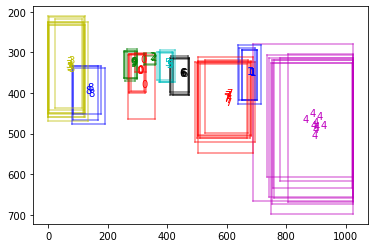

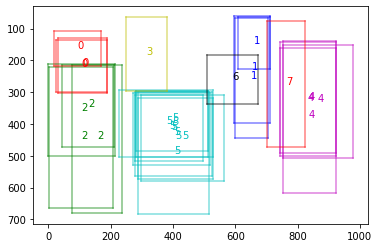

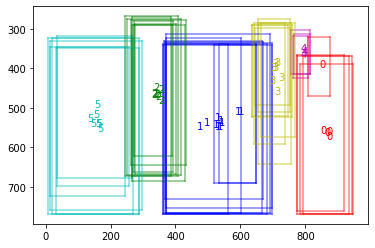

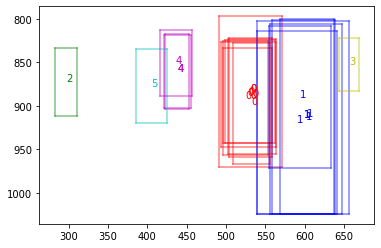

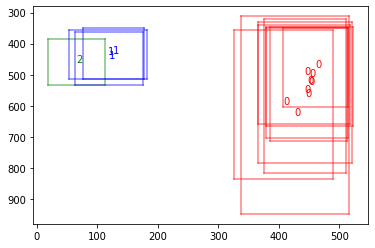

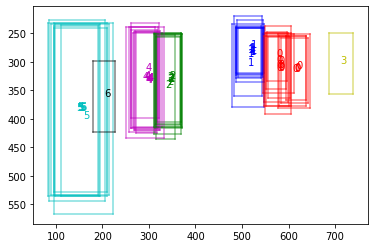

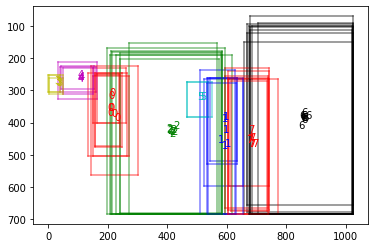

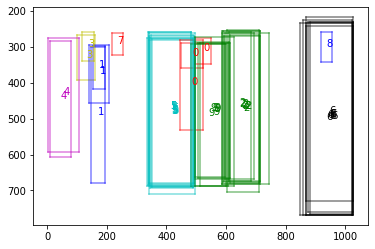

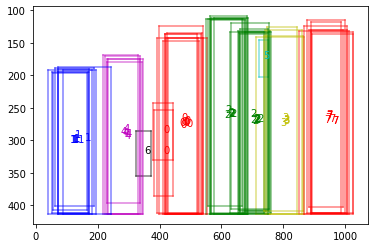

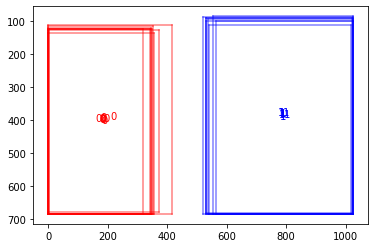

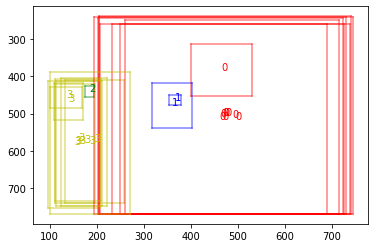

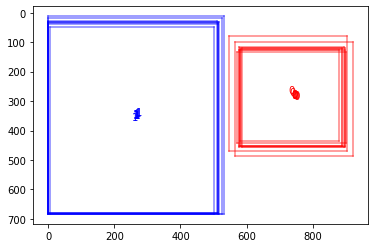

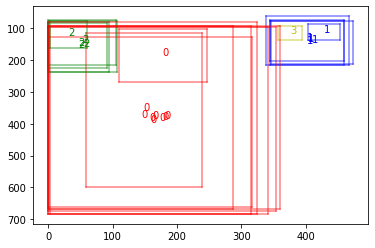

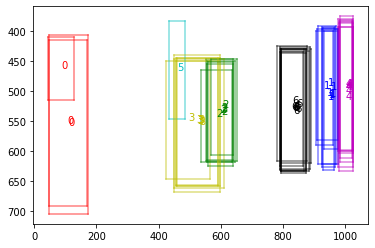

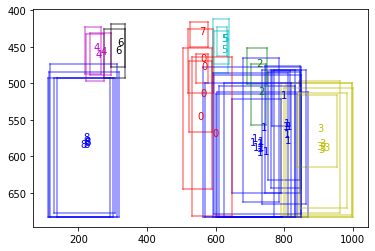

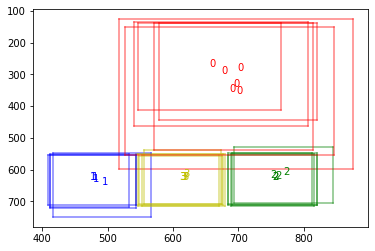

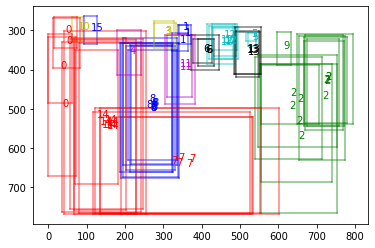

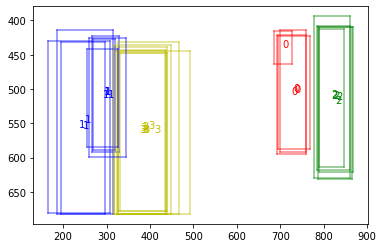

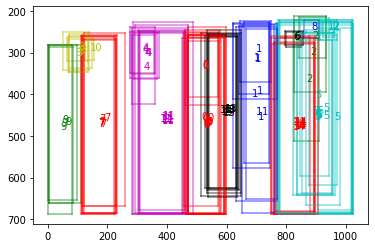

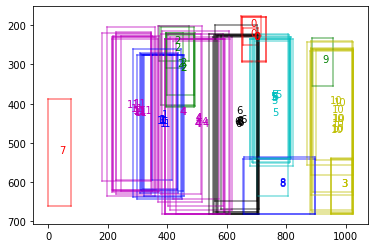

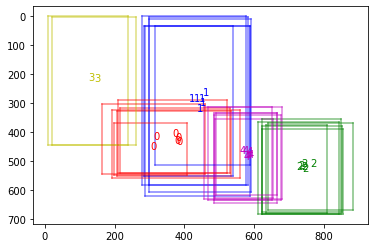

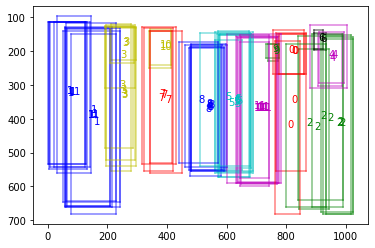

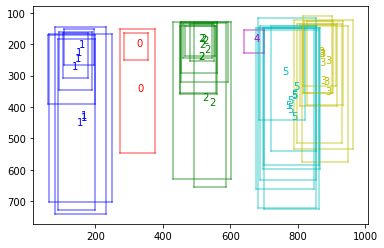

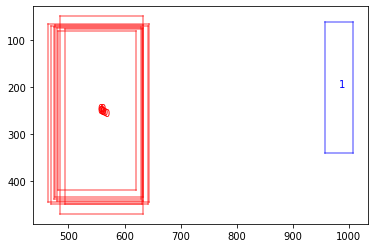

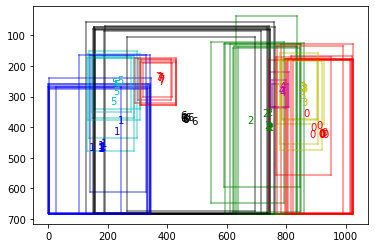

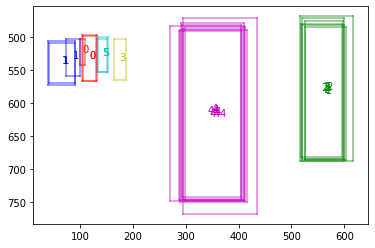

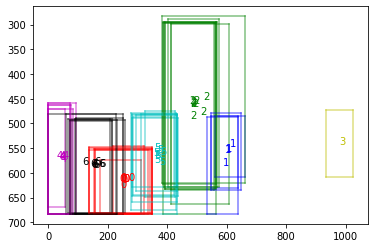

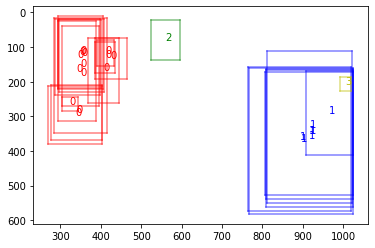

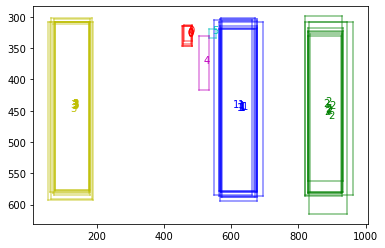

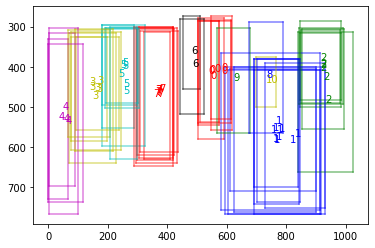

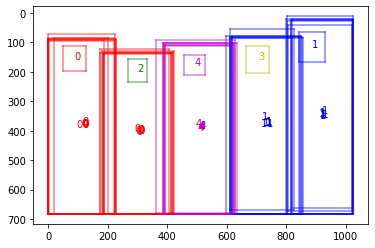

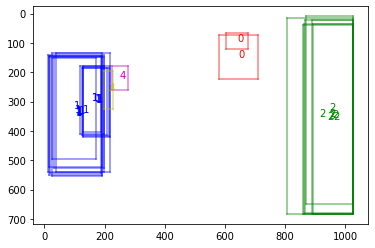

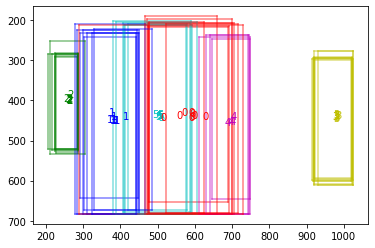

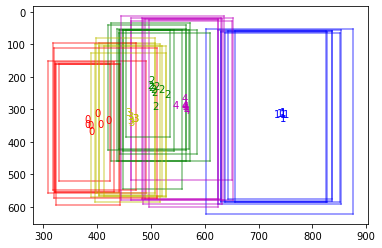

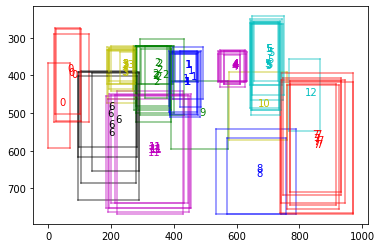

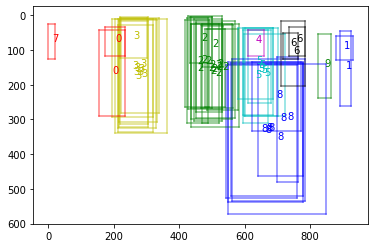

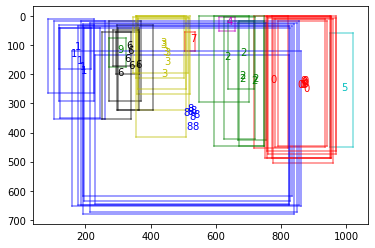

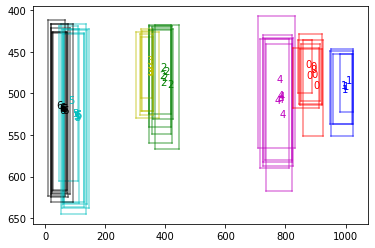

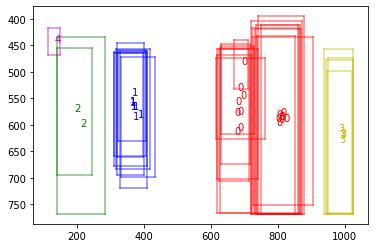

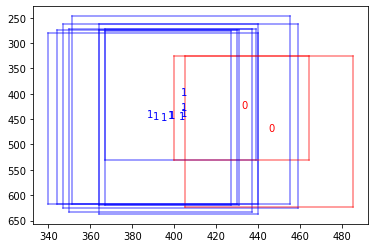

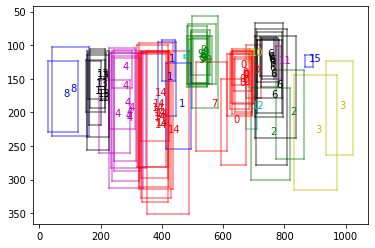

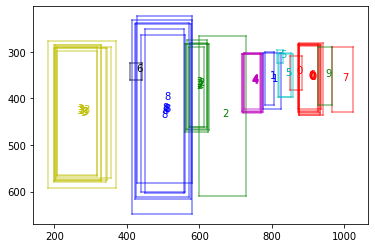

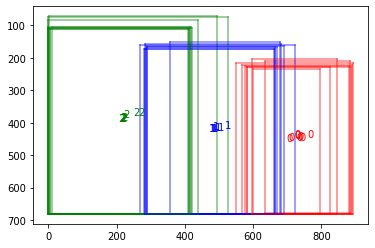

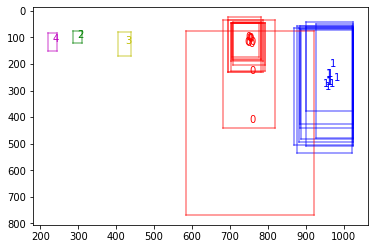

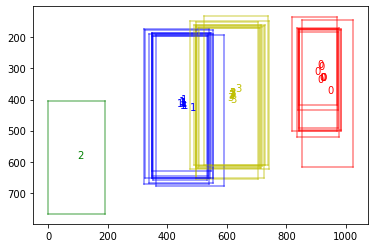

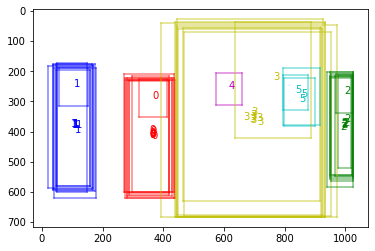

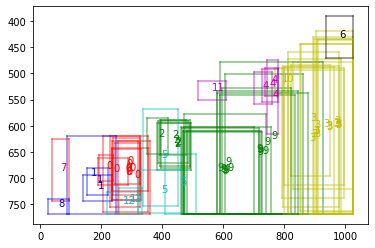

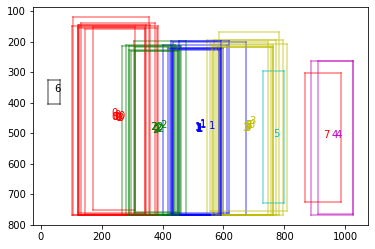

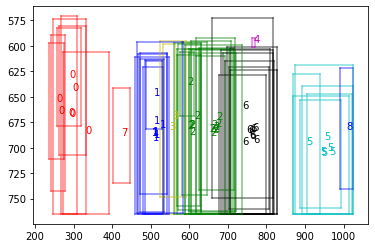

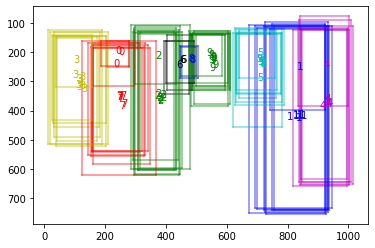

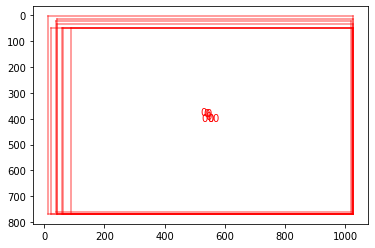

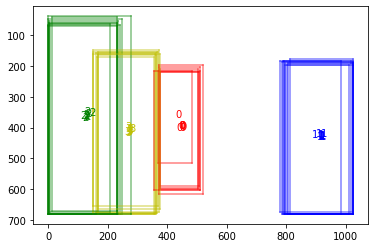

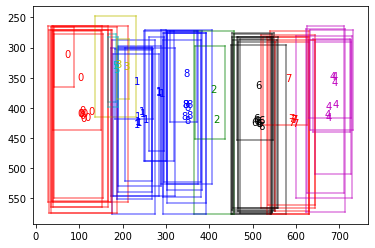

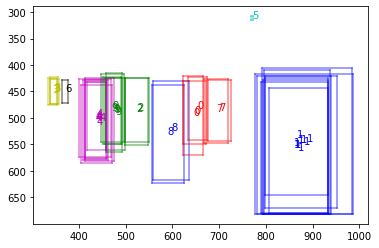

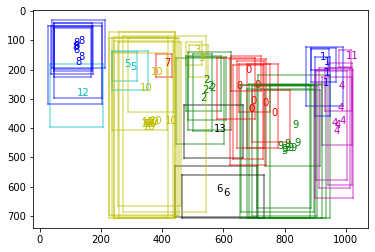

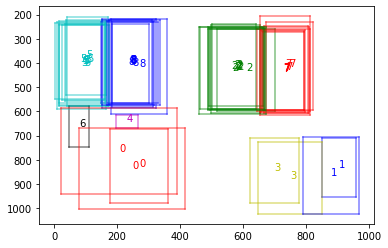

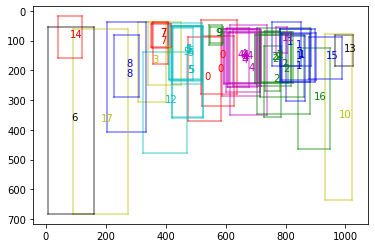

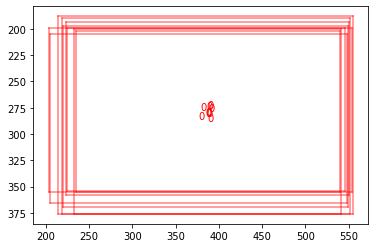

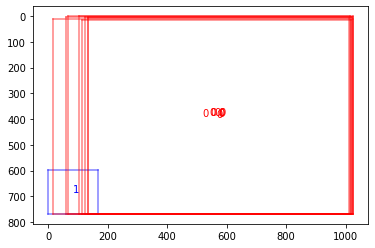

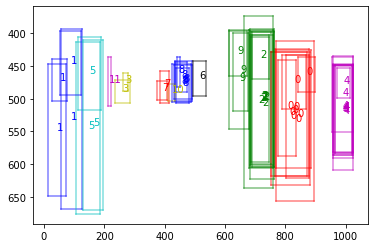

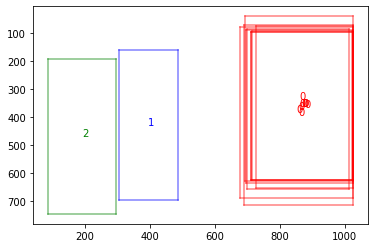

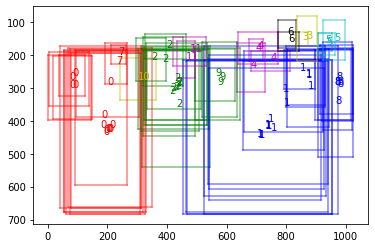

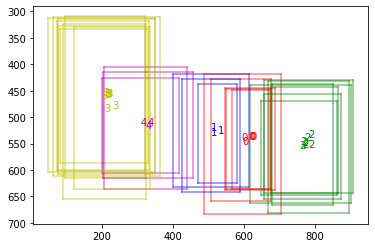

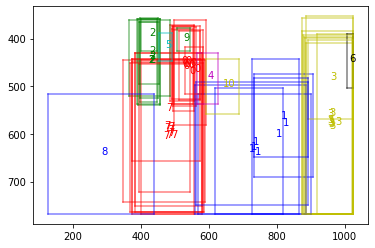

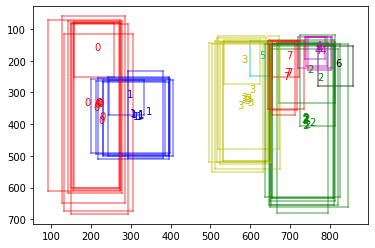

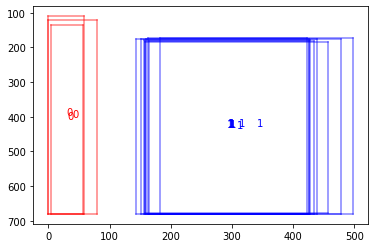

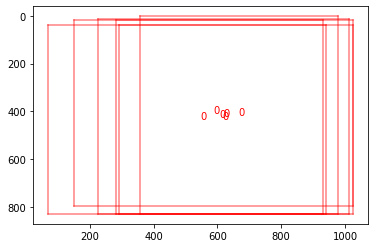

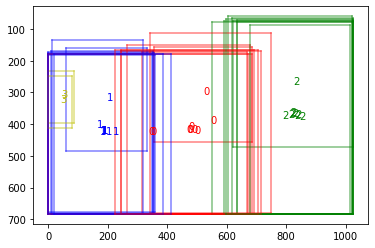

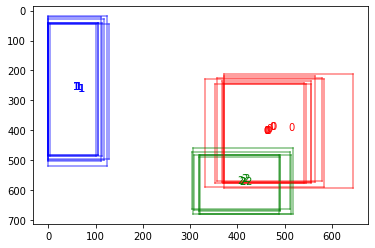

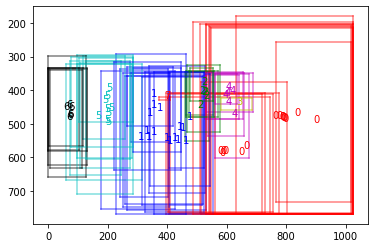

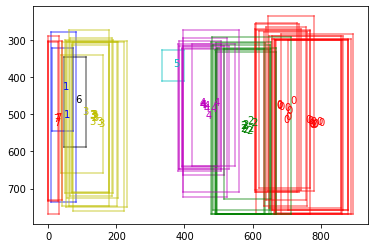

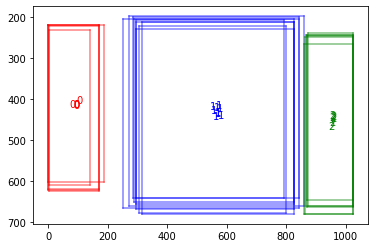

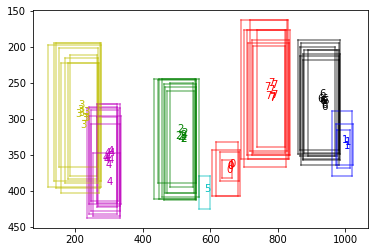

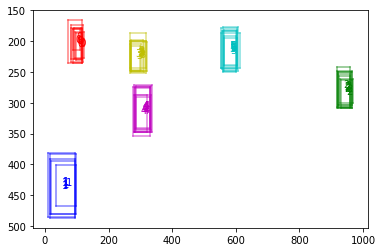

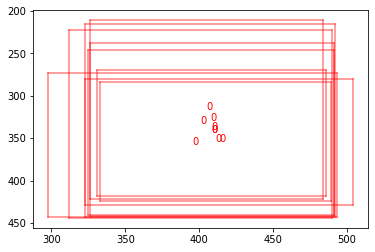

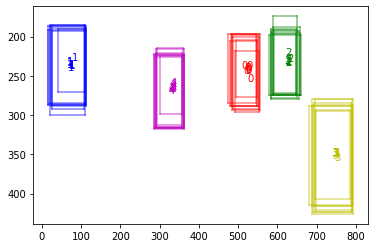

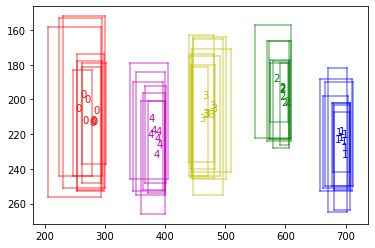

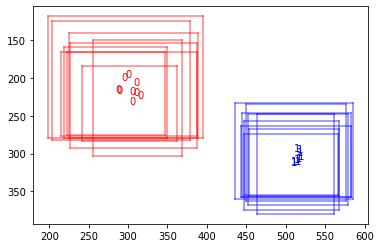

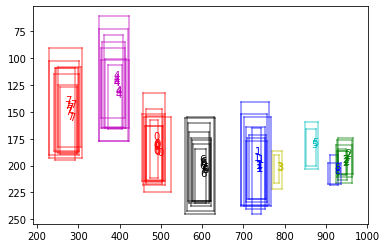

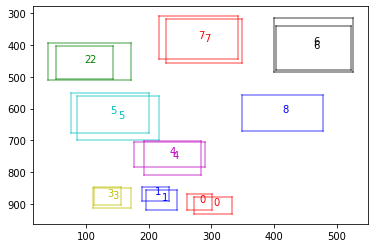

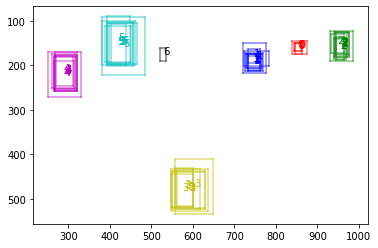

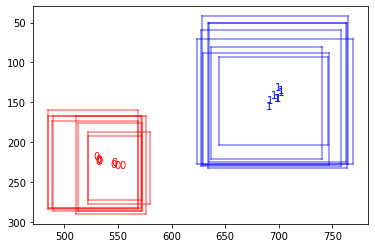

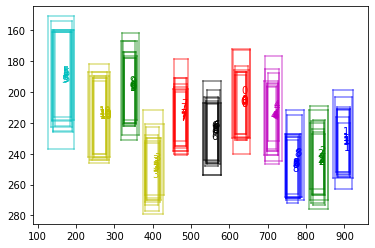

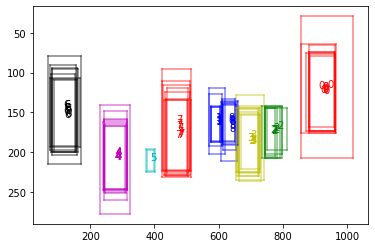

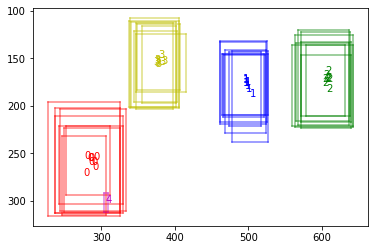

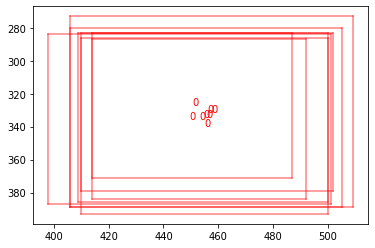

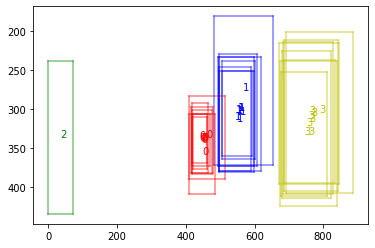

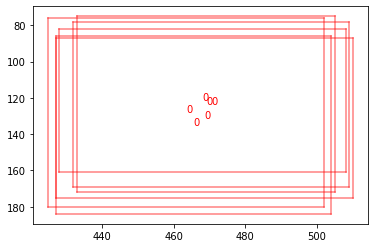

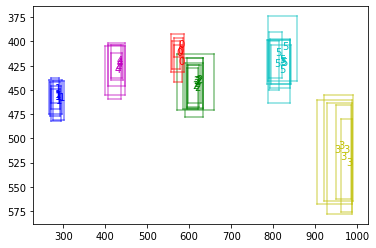

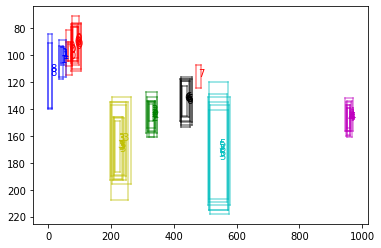

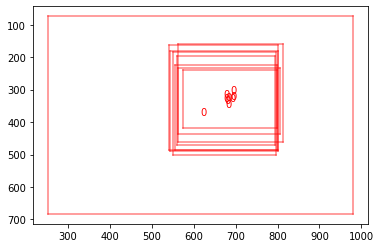

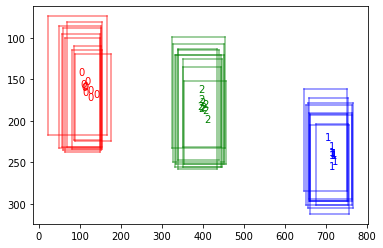

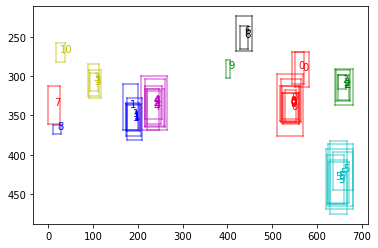

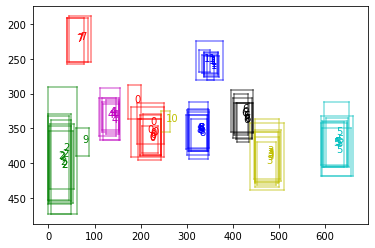

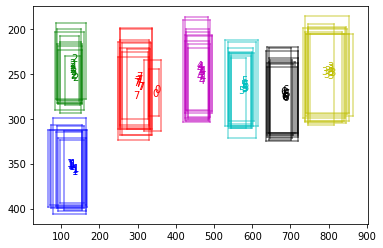

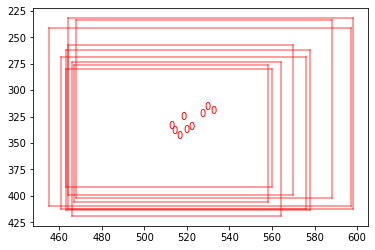

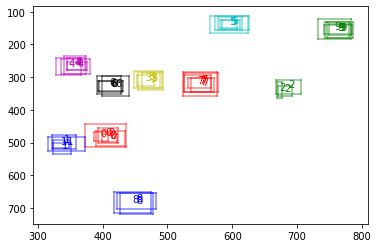

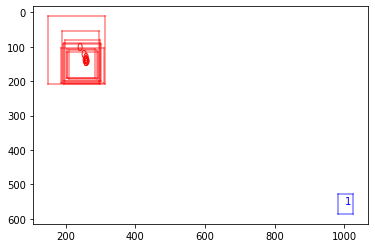

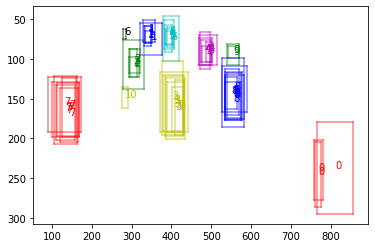

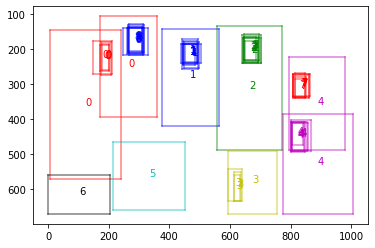

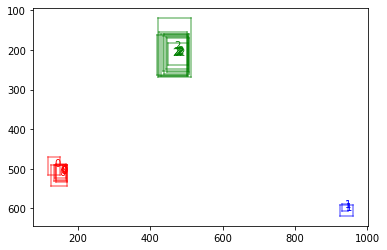

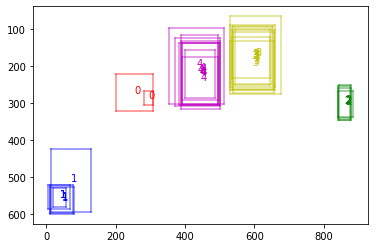

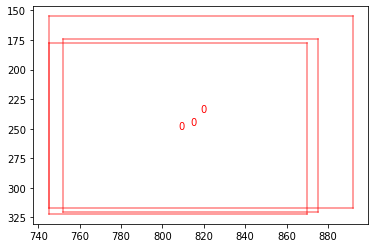

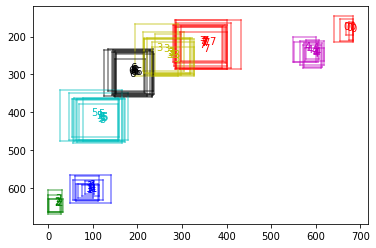

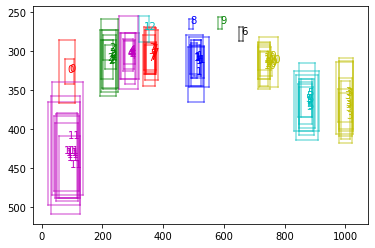

  0%|          | 0/1369 [00:00<?, ?it/s]/Users/alexbraylan/Tools/annotationmodeling/mas/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alexbraylan/Tools/annotationmodeling/mas/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1163/1163 [00:44<00:00, 26.18it/s]


In [2]:
bbexperiment = BBExperiment()
bbexperiment.setup(n_items=100, max_workers_per_item=3, skip_gran=False)

In [3]:
# this just tells it to hold out N items from the dataset
# so that they can be used for semisupervised learning later
nsemisupervised = int(bbexperiment.stan_data["NITEMS"] / 5)
experiments.set_supervised_items(bbexperiment, nsemisupervised)

Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5685799594453601 0.6482339985157337
t-test Ttest_relResult(statistic=-13.005963737061865, pvalue=3.2305269845347473e-35)
z-score 0.46011792134096907
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5685799594453601 0.6614981023177521
t-test Ttest_relResult(statistic=-15.591063477322736, pvalue=4.792876525700265e-48)
z-score 0.5515721759425289
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5685799594453601 0.6600227897809884
t-test Ttest_relResult(statistic=-15.613037971247074, pvalue=3.681337405803441e-48)
z-score 0.5523495776538819
baseline below thresh 0.0
model below thresh 0.0
GVANHORN
0.5685799594453601 0.6445519197554975
t-test Ttest_relResult(statistic=-12.973223237050997, pvalue=4.5989679189529716e-35)
z-score 0.4589596457134786
baseline below thresh 0.0
model below

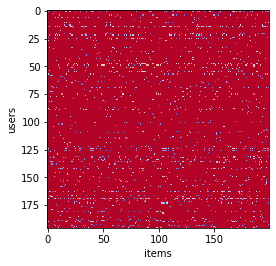

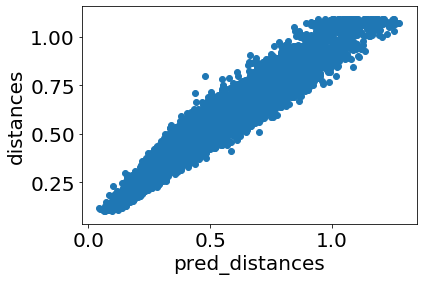

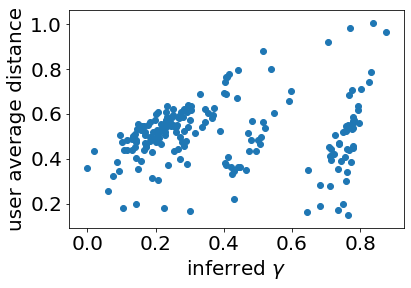

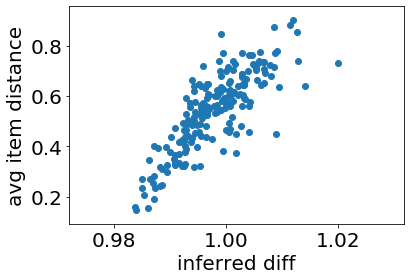

cluster
BEST AVAILABLE USER
0.5705430554339831 0.665164820976475
t-test Ttest_relResult(statistic=-19.450422174455834, pvalue=2.761511120581977e-69)
z-score 0.6881064718497102
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5705430554339831 0.6882781852671133
t-test Ttest_relResult(statistic=-25.251250398900766, pvalue=6.837651794119598e-104)
z-score 0.8933250222506961
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5705430554339831 0.0
t-test Ttest_relResult(statistic=86.11934243222923, pvalue=0.0)
z-score -3.0466833237626725
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5705430554339831 0.6857359315094501
t-test Ttest_relResult(statistic=-24.543322953800985, pvalue=1.419595335355067e-99)
z-score 0.8682803495847765
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5705430554339831 0.5509798701376818
t-test Ttest_relResult(statistic=3.2015493093597827, pvalue=0.00142098125

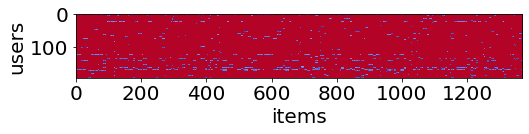

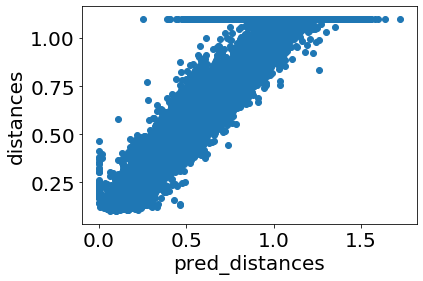

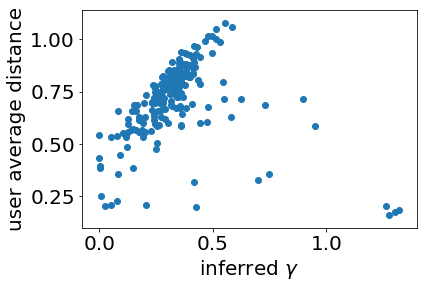

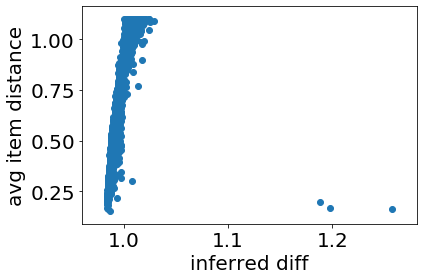

oracle
BEST AVAILABLE USER
0.5734513689201584 0.668091768990245
t-test Ttest_relResult(statistic=-19.619995722644397, pvalue=2.917324977265621e-70)
z-score 0.6941055527393943
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5734513689201584 0.7112329847178482
t-test Ttest_relResult(statistic=-31.57014001637589, pvalue=1.2064623719993517e-142)
z-score 1.1168712672468009
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5734513689201584 0.0
t-test Ttest_relResult(statistic=88.64472052830956, pvalue=0.0)
z-score -3.136024778472202
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5734513689201584 0.7086039011100073
t-test Ttest_relResult(statistic=-29.730402363082327, pvalue=2.2250546686642198e-131)
z-score 1.0517860277397915
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5734513689201584 0.5509798701376818
t-test Ttest_relResult(statistic=3.8482463573004586, pvalue=0.00012845847

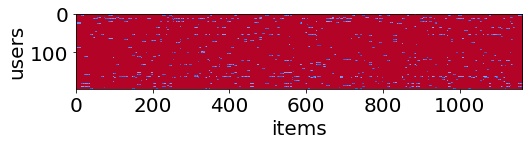

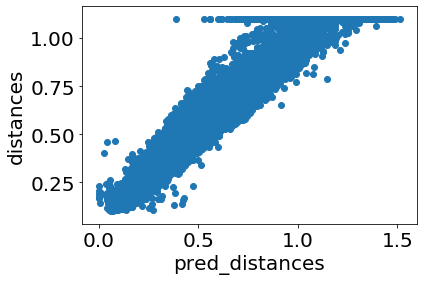

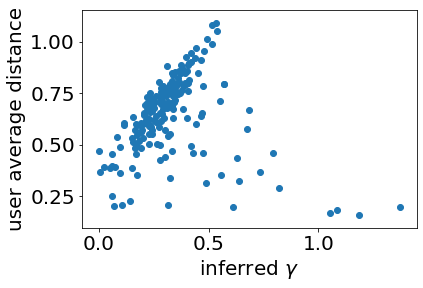

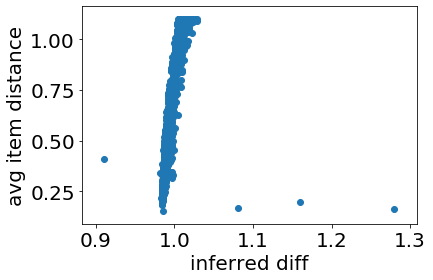

In [4]:
# first train without semisupervised learning
bbexperiment.train(dem_iter=0, mas_iter=500)
bbexperiment.test(debug=True)

100%|██████████| 200/200 [00:11<00:00, 17.18it/s]


Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5672262865184315 0.6481092856783437
t-test Ttest_relResult(statistic=-12.299176901100045, pvalue=5.812453581631445e-32)
z-score 0.4351136005256491
baseline below thresh 0.0
model below thresh 0.0
BEST HONEYPOT USER
0.5672262865184315 0.6386185823162481
t-test Ttest_relResult(statistic=-10.355777476658366, pvalue=1.143884189024945e-23)
z-score 0.3663610711793428
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5672262865184315 0.6614981023177521
t-test Ttest_relResult(statistic=-15.318883275894205, pvalue=1.238330372011516e-46)
z-score 0.5419431326018505
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5672262865184315 0.6678682785183301
t-test Ttest_relResult(statistic=-17.081822567513047, pvalue=5.314436548888292e-56)
z-score 0.604311441379961
baseline below thresh 0.0
model

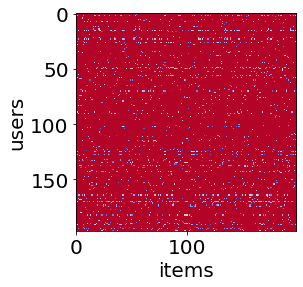

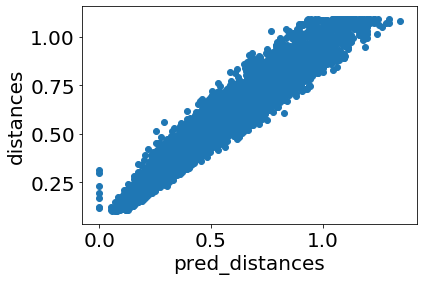

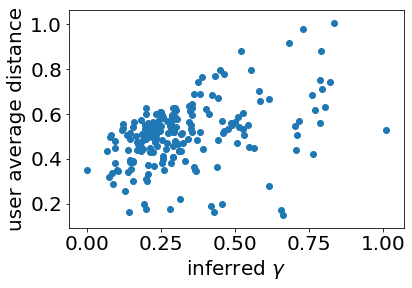

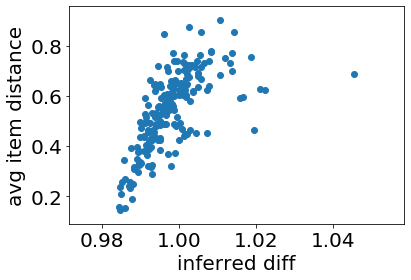

cluster
BEST AVAILABLE USER
0.5729819937657321 0.665164820976475
t-test Ttest_relResult(statistic=-18.71584462791539, pvalue=4.30714601205775e-65)
z-score 0.662118986369123
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5729819937657321 0.6882781852671133
t-test Ttest_relResult(statistic=-24.668895162093406, pvalue=2.4406278003404927e-100)
z-score 0.8727227749694529
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5729819937657321 0.0
t-test Ttest_relResult(statistic=86.7646679436959, pvalue=0.0)
z-score -3.06951329922064
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5729819937657321 0.6857359315094501
t-test Ttest_relResult(statistic=-23.737037049970514, pvalue=1.1175298188620323e-94)
z-score 0.839756004785949
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5729819937657321 0.5509798701376818
t-test Ttest_relResult(statistic=3.7004517622962343, pvalue=0.0002299707005447

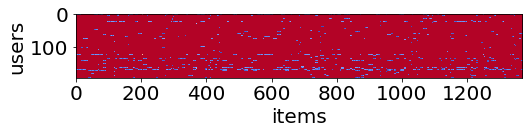

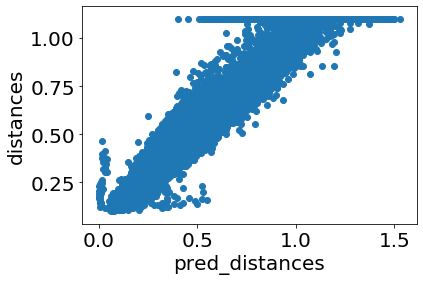

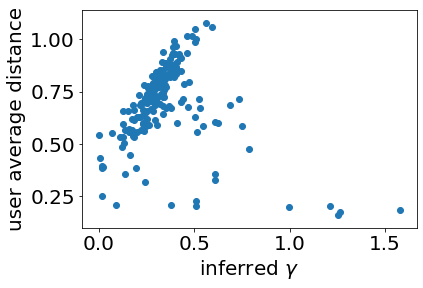

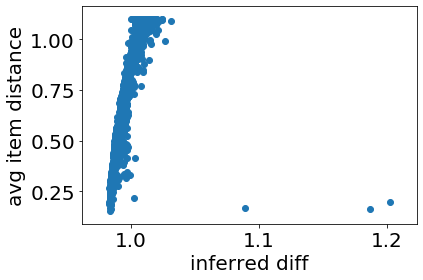

oracle
BEST AVAILABLE USER
0.5772586977864355 0.668091768990245
t-test Ttest_relResult(statistic=-18.300900852581645, pvalue=9.44875801296144e-63)
z-score 0.6474393308480267
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5772586977864355 0.7112329847178482
t-test Ttest_relResult(statistic=-31.762662873261515, pvalue=8.057922221856745e-144)
z-score 1.12368223631543
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5772586977864355 0.0
t-test Ttest_relResult(statistic=87.37906947000164, pvalue=0.0)
z-score -3.0912492627269
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5772586977864355 0.7086039011100073
t-test Ttest_relResult(statistic=-30.445336185263873, pvalue=9.180987445529799e-136)
z-score 1.0770785682088333
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5772586977864355 0.5509798701376818
t-test Ttest_relResult(statistic=4.461418936529362, pvalue=9.309560369136637e-0

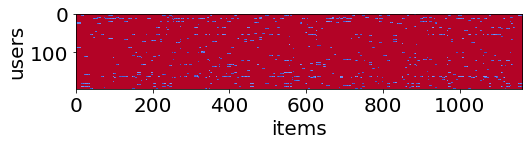

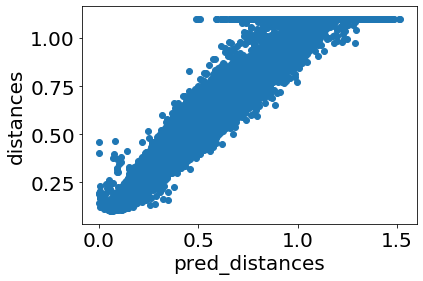

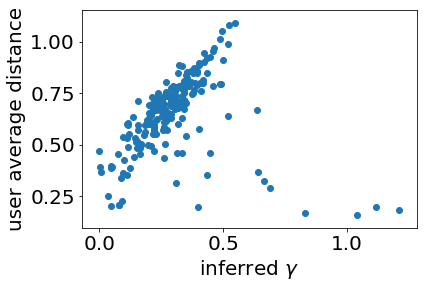

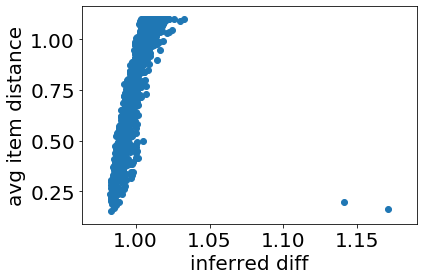

In [5]:
# now add those items back in
# (but not to the test set.. test sets must be comparable between unsup and semisup)
experiments.make_supervised_standata(bbexperiment)
bbexperiment.train(dem_iter=0, mas_iter=500)
bbexperiment.test(debug=True)